Nama: Michael Sotaronggal Manurung
NPM: 6181801027

Nama: Nicholas Khrisna
NPM: 6181801060

In [135]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

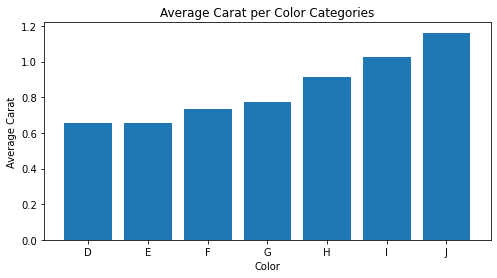

<Figure size 432x288 with 0 Axes>

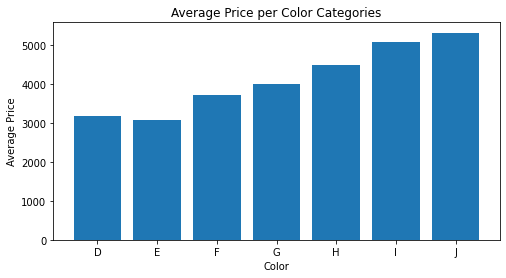

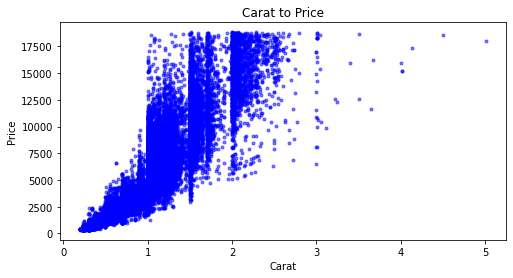

Carat to Price Correlation: 0.9215913011934772


<Figure size 432x288 with 0 Axes>

In [136]:
# store csv file as DataFrame & set Collumn 'no' as index
diamondDataFrame = pd.read_csv('diamonds.csv').set_index('No')

# menghitung rata-rata carat dari tiap warna berlian dan mengurutkannya dari yang terbaik (D) hingga terburuk (J)
colorMeanDF = diamondDataFrame.groupby('color').mean().sort_values('color', ascending=True)

plt.figure(figsize=[8,4])
plt.title('Average Carat per Color Categories')
plt.xlabel('Color')
plt.ylabel('Average Carat')
plt.bar(colorMeanDF.index, colorMeanDF['carat'])
plt.show()
plt.clf()

# plot data price per color
plt.figure(figsize=[8,4])
plt.title('Average Price per Color Categories')
plt.xlabel('Color')
plt.ylabel('Average Price')

plt.bar(colorMeanDF.index,colorMeanDF['price'])
plt.show()

# get 2 collumn (carat & price) as dataframe then sort by 'carat'
caratPriceDF = diamondDataFrame[['carat','price']].sort_values('carat')

# figure title and label
plt.figure(figsize=[8,4])
plt.title('Carat to Price')
plt.xlabel('Carat')
plt.ylabel('Price')

# plot scatter: karena data carat dan harga cukup beragam agar grafik dapat memperlihatkan keberagaman tersebut
plt.scatter(caratPriceDF['carat'], caratPriceDF['price'], c='b', alpha=0.5, marker='.')
plt.show()
plt.clf()

print('Carat to Price Correlation: ' + str(caratPriceDF['carat'].corr(caratPriceDF['price'])))

Pada 3 grafik sebelumnya kolom data yang dieksplorasi ialah kolom price, carat, dan color. Beberapa kesimpulan yang dapat diambil ialah:
- diamond dengan color yang semakin buruk secara rata-rata cenderung memiliki karat yang lebih tinggi atau berat diamond yang lebih berat.
- diamond dengan color yang semakin buruk secara rata-rata harga diamond dijual lebih tinggi dibanding dengan diamond dengan warna yang lebih bagus.
- Pada grafk Carat to Price diketahui melalui scatter plot dan fungsi corr() dari numpy bahwa kedua kolom data memiliki korelasi positif yang kuat di angka 0.92

Pada kesimpulan 1 dan 2 diduga bahwa harga rata-rata harga color tipe J (tipe terburuk) memiliki harga rata-rata yang sangat tinggi karena jumlah data berlian pada tipe J sedikit sehingga faktor pembaginya semakin kecil sehingga perhitungan rata-rata menjadi sangat tinggi.

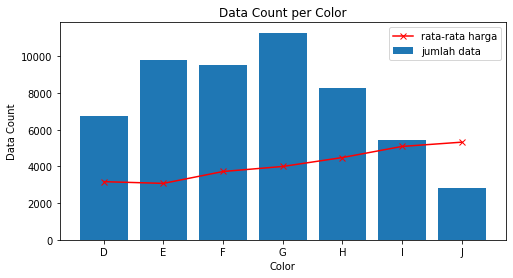

<Figure size 432x288 with 0 Axes>

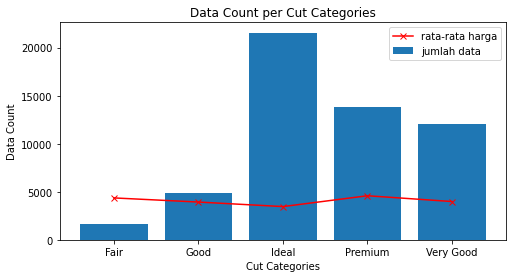

<Figure size 432x288 with 0 Axes>

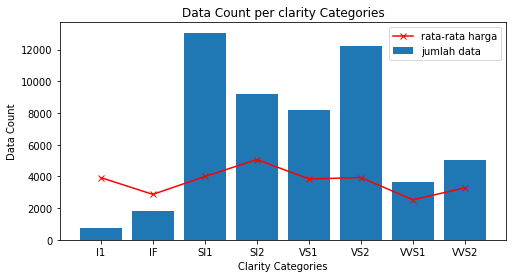

<Figure size 432x288 with 0 Axes>

In [137]:
# get 2 collumn of data: color & data count
colorDataDF = diamondDataFrame[['color','price']].sort_values('color')

# menghitung jumlah data dari tiap kategori kualitas potongan
colorDataStat = colorDataDF.groupby('color')['price'].agg(['count',np.mean])

# plot total data count for each cut categories
plt.figure(figsize=[8,4])
plt.title('Data Count per Color')
plt.xlabel('Color')
plt.ylabel('Data Count')
plt.bar(colorDataStat.index, colorDataStat['count'], label='jumlah data')
plt.plot(colorDataStat.index, colorDataStat['mean'], c='r', marker='x', label='rata-rata harga')
plt.legend(loc='best')
plt.show()
plt.clf()

#get 2 collumn (cut & price)
cutPriceDF = diamondDataFrame[['cut','price']].sort_values('cut')

# menghitung jumlah data dari tiap kategori kualitas potongan
cutPriceStat = cutPriceDF.groupby('cut')['price'].agg(['count',np.mean])

# plot total data count for each cut categories
plt.figure(figsize=[8,4])
plt.title('Data Count per Cut Categories')
plt.xlabel('Cut Categories')
plt.ylabel('Data Count')
plt.bar(cutPriceStat.index, cutPriceStat['count'], label='jumlah data')
plt.plot(cutPriceStat.index, cutPriceStat['mean'], c='r', marker='x', label='rata-rata harga')
plt.legend(loc='best')
plt.show()
plt.clf()

#get 2 collumn (cut & price)
clarityPriceDF = diamondDataFrame[['clarity','price']].sort_values('clarity')

# menghitung jumlah data dari tiap kategori kualitas potongan
clarityPriceStat = clarityPriceDF.groupby('clarity')['price'].agg(['count',np.mean])

# plot total data count for each clarity categories
plt.figure(figsize=[8,4])
plt.title('Data Count per clarity Categories')
plt.xlabel('Clarity Categories')
plt.ylabel('Data Count')
plt.bar(clarityPriceStat.index, clarityPriceStat['count'], label='jumlah data')
plt.plot(clarityPriceStat.index, clarityPriceStat['mean'], c='r', marker='x', label='rata-rata harga')
plt.legend(loc='best')
plt.show()
plt.clf()

Dapat dilihat pada grafik data count per color bahwa memang warna J (tipe terburuk) memiliki jumlah data paling sedikit sehingga hal ini mengkonfirmasi dugaan sebelumnya. Dimana harga rata-rata diamond tipe J menjadi paling tinggi lebih didominasi karena jumlah datanya yang sedikit sehingga faktor baginya semakin kecil.

Dari visualisasi ketiga grafik diketahui harga rata-rata untuk setiap kualitas baik berdasarkan color, cut, atau clarity cukup beragam dan tidak linear.

Berikut eksperimen untuk membuat scatter plot untuk diamond dengan color, cut, dan clarity terbaik.

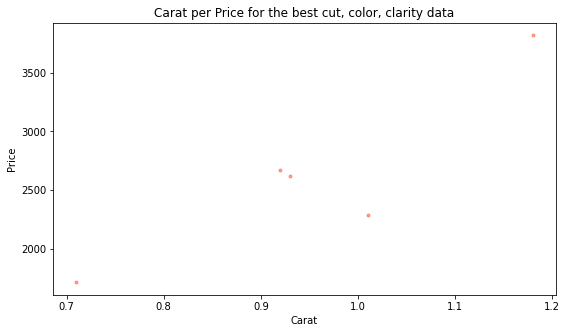

<Figure size 432x288 with 0 Axes>

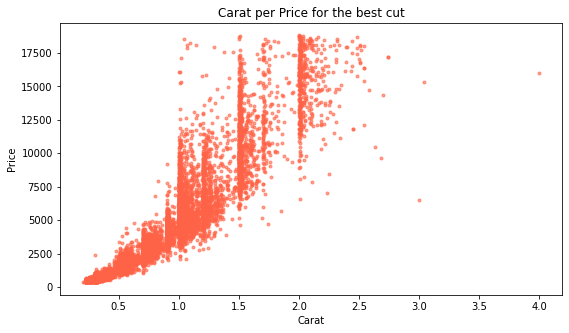

<Figure size 432x288 with 0 Axes>

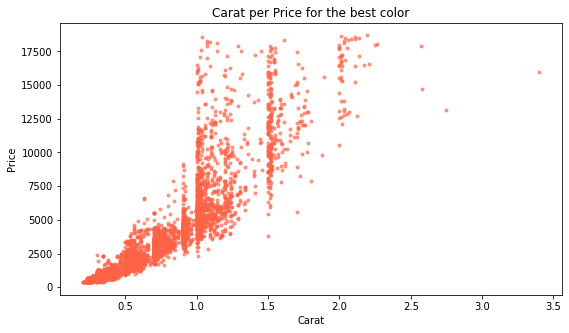

<Figure size 432x288 with 0 Axes>

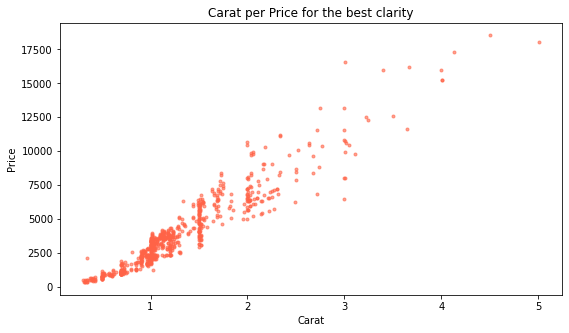

<Figure size 432x288 with 0 Axes>

In [138]:
# filter data berdasarkan kategori kualitas potongan terbaik dari cut, color, dan claritynya
bestCategoryDiamondDF = diamondDataFrame[(diamondDataFrame['cut'] == 'Very Good') & (diamondDataFrame['color'] == 'D') & (diamondDataFrame['clarity'] == 'I1')]
plt.figure(figsize=[9,5])
plt.title('Carat per Price for the best cut, color, clarity data')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.scatter(bestCategoryDiamondDF['carat'], bestCategoryDiamondDF['price'], c='tomato', alpha=0.6, marker='.')
plt.show()
plt.clf()
# print(bestCategoryDiamondDF)

# karena data hasil filter dengan kategori kualitas potongan terbaik sangat sedikit maka lakukan ploting terbaik untuk setiap kategori secara terpisah
bestCutCategoryDiamondDF = diamondDataFrame[(diamondDataFrame['cut'] == 'Very Good')]
plt.figure(figsize=[9,5])
plt.title('Carat per Price for the best cut')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.scatter(bestCutCategoryDiamondDF['carat'], bestCutCategoryDiamondDF['price'], c='tomato', alpha=0.6, marker='.')
plt.show()
plt.clf()

bestColorCategoryDiamondDF = diamondDataFrame[(diamondDataFrame['color'] == 'D')]
plt.figure(figsize=[9,5])
plt.title('Carat per Price for the best color')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.scatter(bestColorCategoryDiamondDF['carat'], bestColorCategoryDiamondDF['price'], c='tomato', alpha=0.6, marker='.')
plt.show()
plt.clf()

bestClarityCategoryDiamondDF = diamondDataFrame[(diamondDataFrame['clarity'] == 'I1')]
plt.figure(figsize=[9,5])
plt.title('Carat per Price for the best clarity')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.scatter(bestClarityCategoryDiamondDF['carat'], bestClarityCategoryDiamondDF['price'], c='tomato', alpha=0.6, marker='.')
plt.show()
plt.clf()

Tahap eksplorasi berikutnya untuk mencari hubungan antara x,y,z dan depth diamond tersebut untuk beberapa kategori seperti cut, color, dan claritynya

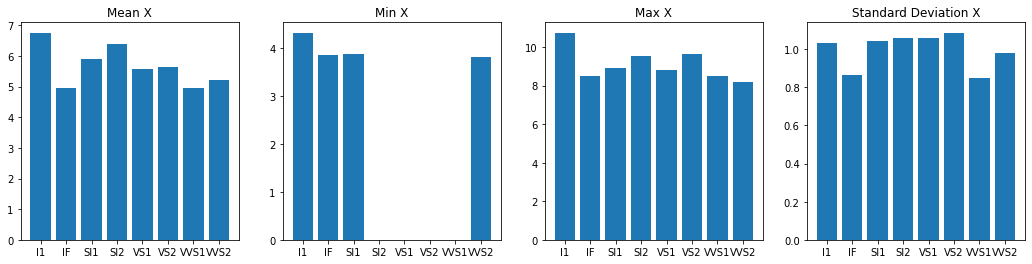

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

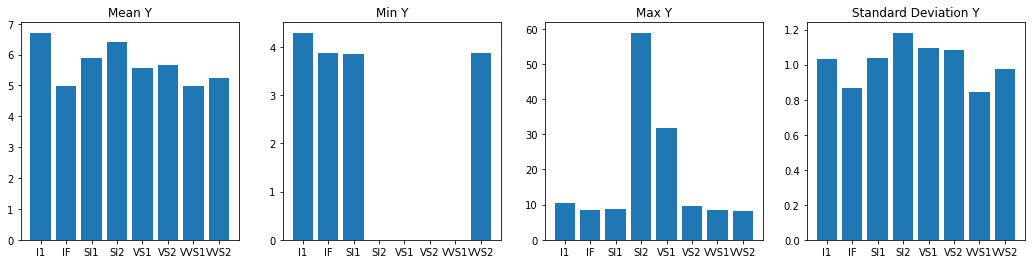

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

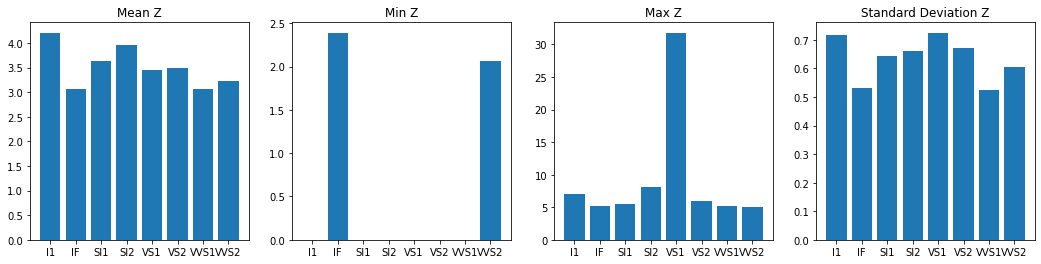

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

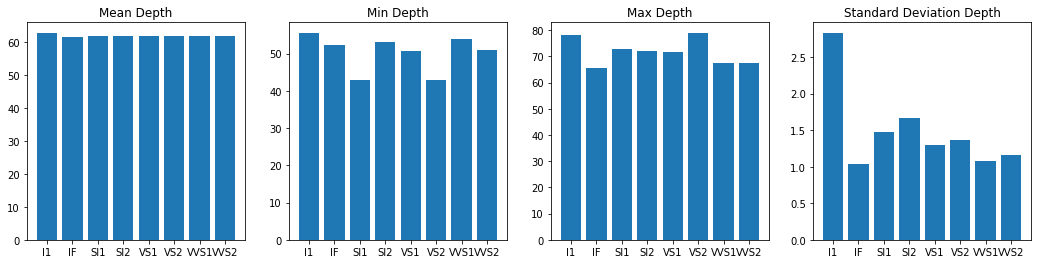

<Figure size 432x288 with 0 Axes>

In [139]:
dataMeanClarityDF = diamondDataFrame[['clarity','x','y','z','depth']].groupby('clarity').agg(['count',np.mean, np.std, np.min, np.max])

# ploting data mean, std, min, max for each X attribute
fig, axs = plt.subplots(1, 4)
fig.set_figwidth(18)
fig.set_figheight(4)
axs[0].bar(dataMeanClarityDF.index, dataMeanClarityDF['x']['mean'])
axs[0].title.set_text('Mean X')
axs[1].bar(dataMeanClarityDF.index, dataMeanClarityDF['x']['amin'])
axs[1].title.set_text('Min X')
axs[2].bar(dataMeanClarityDF.index, dataMeanClarityDF['x']['amax'])
axs[2].title.set_text('Max X')
axs[3].bar(dataMeanClarityDF.index, dataMeanClarityDF['x']['std'])
axs[3].title.set_text('Standard Deviation X')
plt.show()
plt.clf()

# ploting data mean, std, min, max for each Y attribute
fig2 = plt.figure()
fig2, axs = plt.subplots(1, 4)
fig2.set_figwidth(18)
fig2.set_figheight(4)
axs[0].bar(dataMeanClarityDF.index, dataMeanClarityDF['y']['mean'])
axs[0].title.set_text('Mean Y')
axs[1].bar(dataMeanClarityDF.index, dataMeanClarityDF['y']['amin'])
axs[1].title.set_text('Min Y')
axs[2].bar(dataMeanClarityDF.index, dataMeanClarityDF['y']['amax'])
axs[2].title.set_text('Max Y')
axs[3].bar(dataMeanClarityDF.index, dataMeanClarityDF['y']['std'])
axs[3].title.set_text('Standard Deviation Y')
plt.show()
plt.clf()

# ploting data mean, std, min, max for each Z attribute
fig3 = plt.figure()
fig3, axs = plt.subplots(1, 4)
fig3.set_figwidth(18)
fig3.set_figheight(4)
axs[0].bar(dataMeanClarityDF.index, dataMeanClarityDF['z']['mean'])
axs[0].title.set_text('Mean Z')
axs[1].bar(dataMeanClarityDF.index, dataMeanClarityDF['z']['amin'])
axs[1].title.set_text('Min Z')
axs[2].bar(dataMeanClarityDF.index, dataMeanClarityDF['z']['amax'])
axs[2].title.set_text('Max Z')
axs[3].bar(dataMeanClarityDF.index, dataMeanClarityDF['z']['std'])
axs[3].title.set_text('Standard Deviation Z')
plt.show()
plt.clf()

# ploting data mean, std, min, max for each depth attribute
fig4 = plt.figure()
fig4, axs = plt.subplots(1, 4)
fig4.set_figwidth(18)
fig4.set_figheight(4)
axs[0].bar(dataMeanClarityDF.index, dataMeanClarityDF['depth']['mean'])
axs[0].title.set_text('Mean Depth')
axs[1].bar(dataMeanClarityDF.index, dataMeanClarityDF['depth']['amin'])
axs[1].title.set_text('Min Depth')
axs[2].bar(dataMeanClarityDF.index, dataMeanClarityDF['depth']['amax'])
axs[2].title.set_text('Max Depth')
axs[3].bar(dataMeanClarityDF.index, dataMeanClarityDF['depth']['std'])
axs[3].title.set_text('Standard Deviation Depth')
plt.show()
plt.clf()


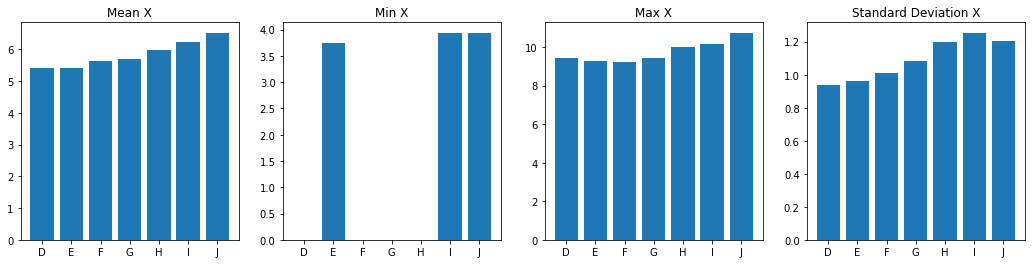

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

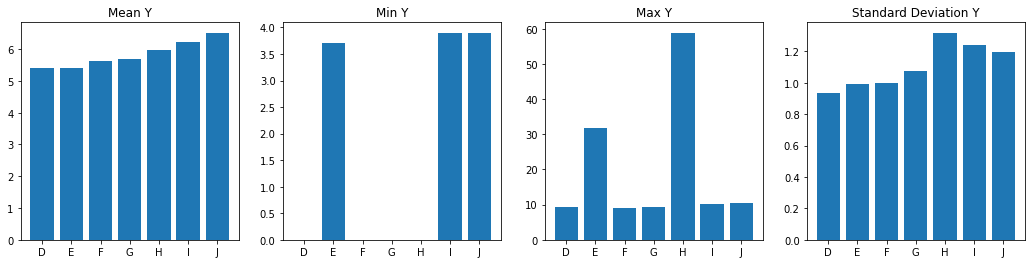

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

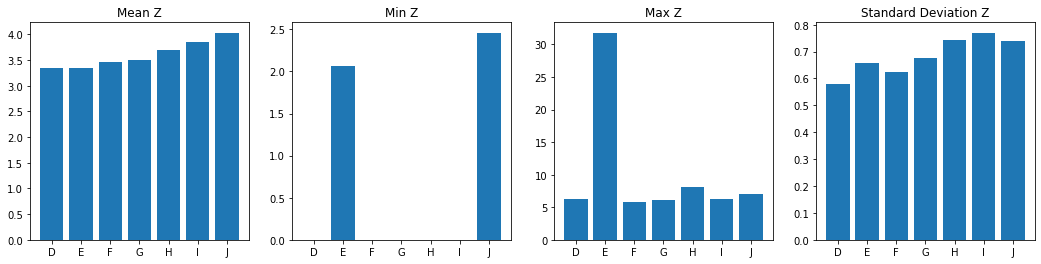

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

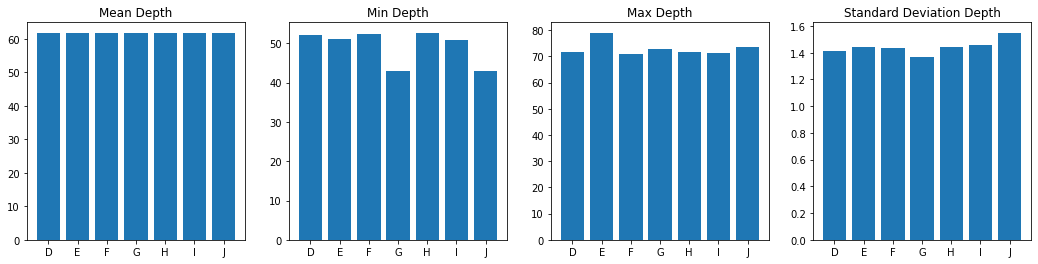

<Figure size 432x288 with 0 Axes>

In [140]:
dataMeanColorDF = diamondDataFrame[['color','x','y','z','depth']].groupby('color').agg(['count',np.mean, np.std, np.min, np.max])

# ploting data mean, std, min, max for each X attribute
fig, axs = plt.subplots(1, 4)
fig.set_figwidth(18)
fig.set_figheight(4)
axs[0].bar(dataMeanColorDF.index, dataMeanColorDF['x']['mean'])
axs[0].title.set_text('Mean X')
axs[1].bar(dataMeanColorDF.index, dataMeanColorDF['x']['amin'])
axs[1].title.set_text('Min X')
axs[2].bar(dataMeanColorDF.index, dataMeanColorDF['x']['amax'])
axs[2].title.set_text('Max X')
axs[3].bar(dataMeanColorDF.index, dataMeanColorDF['x']['std'])
axs[3].title.set_text('Standard Deviation X')
plt.show()
plt.clf()

# ploting data mean, std, min, max for each Y attribute
fig2 = plt.figure()
fig2, axs = plt.subplots(1, 4)
fig2.set_figwidth(18)
fig2.set_figheight(4)
axs[0].bar(dataMeanColorDF.index, dataMeanColorDF['y']['mean'])
axs[0].title.set_text('Mean Y')
axs[1].bar(dataMeanColorDF.index, dataMeanColorDF['y']['amin'])
axs[1].title.set_text('Min Y')
axs[2].bar(dataMeanColorDF.index, dataMeanColorDF['y']['amax'])
axs[2].title.set_text('Max Y')
axs[3].bar(dataMeanColorDF.index, dataMeanColorDF['y']['std'])
axs[3].title.set_text('Standard Deviation Y')
plt.show()
plt.clf()

# ploting data mean, std, min, max for each Z attribute
fig3 = plt.figure()
fig3, axs = plt.subplots(1, 4)
fig3.set_figwidth(18)
fig3.set_figheight(4)
axs[0].bar(dataMeanColorDF.index, dataMeanColorDF['z']['mean'])
axs[0].title.set_text('Mean Z')
axs[1].bar(dataMeanColorDF.index, dataMeanColorDF['z']['amin'])
axs[1].title.set_text('Min Z')
axs[2].bar(dataMeanColorDF.index, dataMeanColorDF['z']['amax'])
axs[2].title.set_text('Max Z')
axs[3].bar(dataMeanColorDF.index, dataMeanColorDF['z']['std'])
axs[3].title.set_text('Standard Deviation Z')
plt.show()
plt.clf()

# ploting data mean, std, min, max for each depth attribute
fig4 = plt.figure()
fig4, axs = plt.subplots(1, 4)
fig4.set_figwidth(18)
fig4.set_figheight(4)
axs[0].bar(dataMeanColorDF.index, dataMeanColorDF['depth']['mean'])
axs[0].title.set_text('Mean Depth')
axs[1].bar(dataMeanColorDF.index, dataMeanColorDF['depth']['amin'])
axs[1].title.set_text('Min Depth')
axs[2].bar(dataMeanColorDF.index, dataMeanColorDF['depth']['amax'])
axs[2].title.set_text('Max Depth')
axs[3].bar(dataMeanColorDF.index, dataMeanColorDF['depth']['std'])
axs[3].title.set_text('Standard Deviation Depth')
plt.show()
plt.clf()

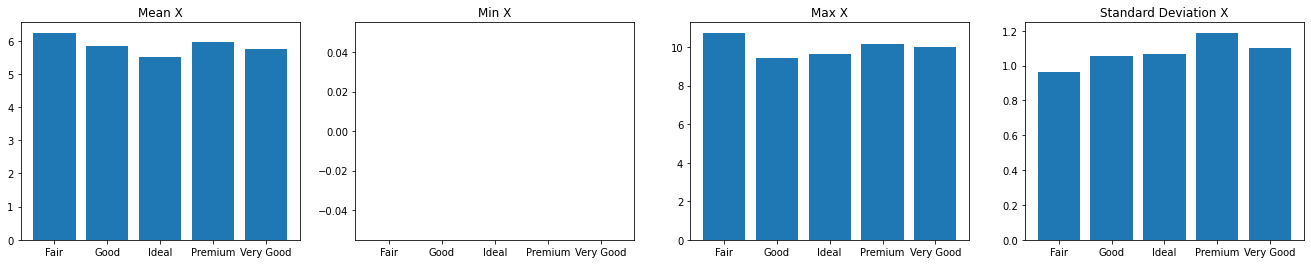

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

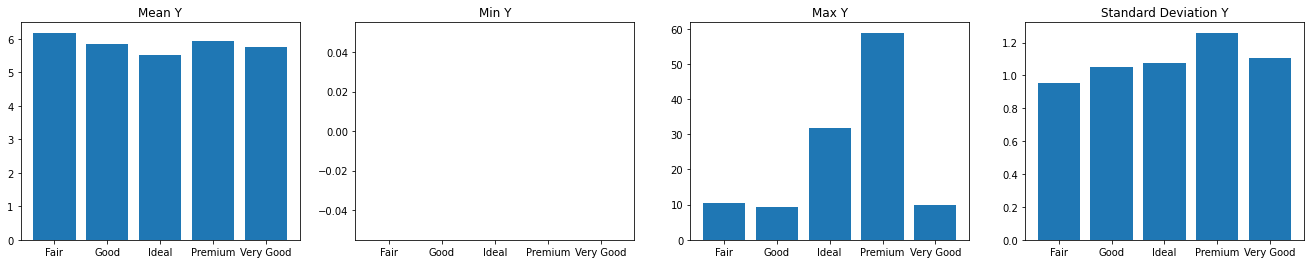

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

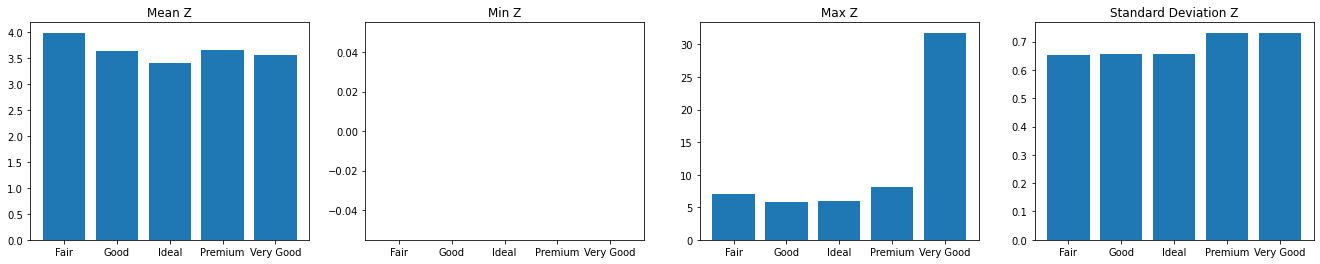

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

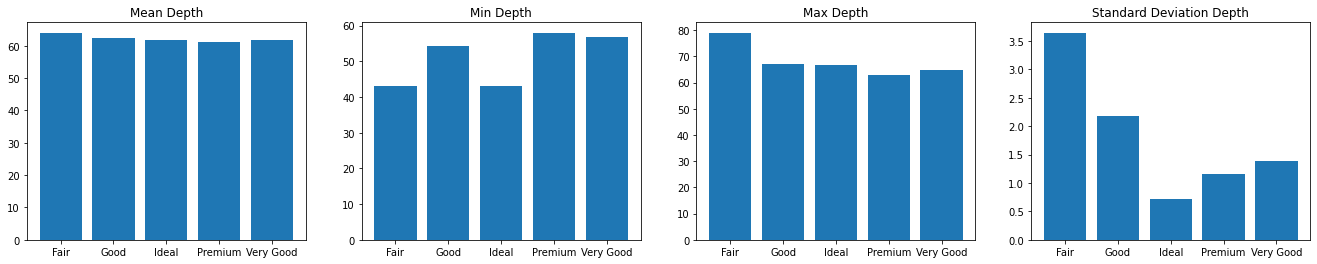

<Figure size 432x288 with 0 Axes>

In [141]:
dataMeanCutDF = diamondDataFrame[['cut','x','y','z','depth']].groupby('cut').agg(['count',np.mean, np.std, np.min, np.max])

# ploting data mean, std, min, max for each X attribute
fig, axs = plt.subplots(1, 4)
fig.set_figwidth(23)
fig.set_figheight(4)
axs[0].bar(dataMeanCutDF.index, dataMeanCutDF['x']['mean'])
axs[0].title.set_text('Mean X')
axs[1].bar(dataMeanCutDF.index, dataMeanCutDF['x']['amin'])
axs[1].title.set_text('Min X')
axs[2].bar(dataMeanCutDF.index, dataMeanCutDF['x']['amax'])
axs[2].title.set_text('Max X')
axs[3].bar(dataMeanCutDF.index, dataMeanCutDF['x']['std'])
axs[3].title.set_text('Standard Deviation X')
plt.show()
plt.clf()

# ploting data mean, std, min, max for each Y attribute
fig2 = plt.figure()
fig2, axs = plt.subplots(1, 4)
fig2.set_figwidth(23)
fig2.set_figheight(4)
axs[0].bar(dataMeanCutDF.index, dataMeanCutDF['y']['mean'])
axs[0].title.set_text('Mean Y')
axs[1].bar(dataMeanCutDF.index, dataMeanCutDF['y']['amin'])
axs[1].title.set_text('Min Y')
axs[2].bar(dataMeanCutDF.index, dataMeanCutDF['y']['amax'])
axs[2].title.set_text('Max Y')
axs[3].bar(dataMeanCutDF.index, dataMeanCutDF['y']['std'])
axs[3].title.set_text('Standard Deviation Y')
plt.show()
plt.clf()

# ploting data mean, std, min, max for each Z attribute
fig3 = plt.figure()
fig3, axs = plt.subplots(1, 4)
fig3.set_figwidth(23)
fig3.set_figheight(4)
axs[0].bar(dataMeanCutDF.index, dataMeanCutDF['z']['mean'])
axs[0].title.set_text('Mean Z')
axs[1].bar(dataMeanCutDF.index, dataMeanCutDF['z']['amin'])
axs[1].title.set_text('Min Z')
axs[2].bar(dataMeanCutDF.index, dataMeanCutDF['z']['amax'])
axs[2].title.set_text('Max Z')
axs[3].bar(dataMeanCutDF.index, dataMeanCutDF['z']['std'])
axs[3].title.set_text('Standard Deviation Z')
plt.show()
plt.clf()

# ploting data mean, std, min, max for each depth attribute
fig4 = plt.figure()
fig4, axs = plt.subplots(1, 4)
fig4.set_figwidth(23)
fig4.set_figheight(4)
axs[0].bar(dataMeanCutDF.index, dataMeanCutDF['depth']['mean'])
axs[0].title.set_text('Mean Depth')
axs[1].bar(dataMeanCutDF.index, dataMeanCutDF['depth']['amin'])
axs[1].title.set_text('Min Depth')
axs[2].bar(dataMeanCutDF.index, dataMeanCutDF['depth']['amax'])
axs[2].title.set_text('Max Depth')
axs[3].bar(dataMeanCutDF.index, dataMeanCutDF['depth']['std'])
axs[3].title.set_text('Standard Deviation Depth')
plt.show()
plt.clf()


Dari 3 kali percobaan sebelumnya melakukan ploting untuk rata-rata, minimal, maksimal, dan standar deviasi nilai x,y,z,depth dari masing-masing kategori yaitu cut, color, dan clarity. Menunujukan bahwa nilai grafik mean pada dataset cut dan clarity menghasilkan data beragam dan cenderung konstan antara setiap kategorinya. Tetapi pada dataset color grafik mean data x, y, z menunjukan peningkatan nilai yang konsisten dari setiap kategorinya. Oleh karena hal tersebut dilakukan pendalaman terkait data x,y,z pada dataset color.

x correlation with y: 0.9747014796703488
y correlation with z: 0.9520057161562747
z correlation with x: 0.970771798577461
              x     price     carat
x      1.000000  0.858892  0.976778
price  0.858892  1.000000  0.900741
carat  0.976778  0.900741  1.000000


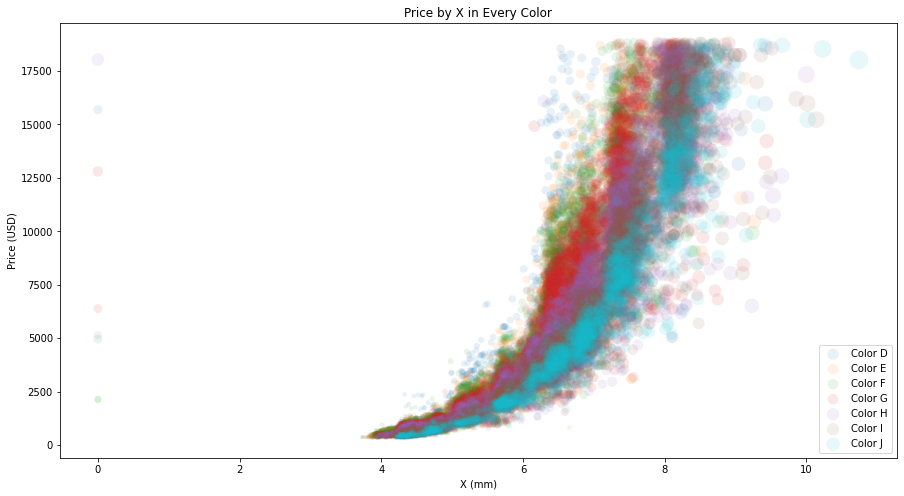

<Figure size 432x288 with 0 Axes>

In [142]:
# mengecek apakah masing-masing data dari x, y, z memiliki korelasi yang signifikan 
print('x correlation with y: ' + diamondDataFrame['x'].corr(diamondDataFrame['y']).astype(str))
print('y correlation with z: ' + diamondDataFrame['y'].corr(diamondDataFrame['z']).astype(str))
print('z correlation with x: ' + diamondDataFrame['z'].corr(diamondDataFrame['x']).astype(str))

# Karena secara umum ketiga kolom data memiliki korelasi kuat disekitar 0.95 hingga 0.97. Menggunakan korelasi tertinggi yaitu x terhadap y untuk diuji dengan kolom lainnya seperti price dan carat untuk setiap colornya.
xPriceDF = diamondDataFrame[['x','price','carat','color']]

# filter untuk setiap warnanya
xdPriceDF = xPriceDF['color'] == 'D'
xePriceDF = xPriceDF['color'] == 'E'
xfPriceDF = xPriceDF['color'] == 'F'
xgPriceDF = xPriceDF['color'] == 'G'
xhPriceDF = xPriceDF['color'] == 'H'
xiPriceDF = xPriceDF['color'] == 'I'
xjPriceDF = xPriceDF['color'] == 'J'

# Color D
print(xPriceDF[xdPriceDF].corr())

plt.figure(figsize=[15,8])
plt.title('Price by X in Every Color')
plt.xlabel('X (mm)')
plt.ylabel('Price (USD)')

# scale dikalikan dengan 70 untuk keperluan visual agar perbedaan skala lebih jelas
plt.scatter(xPriceDF[xdPriceDF]['x'], xPriceDF[xdPriceDF]['price'], s=xPriceDF[xdPriceDF]['carat']*70, color='tab:blue', edgecolors='none', alpha=0.1, label='Color D')
plt.scatter(xPriceDF[xePriceDF]['x'], xPriceDF[xePriceDF]['price'], s=xPriceDF[xePriceDF]['carat']*70, color='tab:orange', edgecolors='none', alpha=0.1, label='Color E')
plt.scatter(xPriceDF[xfPriceDF]['x'], xPriceDF[xfPriceDF]['price'], s=xPriceDF[xfPriceDF]['carat']*70, color='tab:green', edgecolors='none', alpha=0.1, label='Color F')
plt.scatter(xPriceDF[xgPriceDF]['x'], xPriceDF[xgPriceDF]['price'], s=xPriceDF[xgPriceDF]['carat']*70, color='tab:red', edgecolors='none', alpha=0.1, label='Color G')
plt.scatter(xPriceDF[xhPriceDF]['x'], xPriceDF[xhPriceDF]['price'], s=xPriceDF[xhPriceDF]['carat']*70, color='tab:purple', edgecolors='none', alpha=0.1, label='Color H')
plt.scatter(xPriceDF[xiPriceDF]['x'], xPriceDF[xiPriceDF]['price'], s=xPriceDF[xiPriceDF]['carat']*70, color='tab:brown', edgecolors='none', alpha=0.1, label='Color I')
plt.scatter(xPriceDF[xjPriceDF]['x'], xPriceDF[xjPriceDF]['price'], s=xPriceDF[xjPriceDF]['carat']*70, color='tab:cyan', edgecolors='none', alpha=0.1, label='Color J')
plt.legend(loc='best')
plt.show()
plt.clf()

Melalui grafik 'Price by X in Every Color' dapat dilihat secara sekilas bahwa harga meningkat secara eksponensial seiring bertambah panjangnya milimeter diamond tersebut. Besaran karat pada grafik ini digambarkan dengan ukuran skala lingkaran scatter plot. Terlihat sekilas bahwa besaran karat tidak teralu berpengaruh pada grafik ini. Pernyataan ini juga didukung oleh hasil print besaran korelasi antara ketiga data x, price, dan carat semuanya berada diatas 0.85. Sehingga ketiga atribut tersebut berkorelasi kuat positif sehingga cenderung membentuk grafik yang mirip.

Atribut pada grafik ini akan dijadikan data untuk membuat model regresi, karena dari grafik terlihat semua data berkorelasi positif menuju arah yang sama. Maka hanya akan diambil satu data dari kategori color yaitu color D karena pada grafik bar terkait standar deviasi atribut X memiliki nilai terkecil sehingga persebaran datanya lebih kecil.

sum of squared error (linear): 18797394021.808197
sum of squared error (log trick): 1517125663715.3438
sum of squared error 2: 13100641019.49135
sum of squared error 3: 13082667067.76811
sum of squared error 4: 12991356108.748148
sum of squared error 5: 12991317343.845703
sum of squared error 6: 12965942070.99121
sum of squared error 7: 12955453886.022606
sum of squared error 8: 12953738082.852377
sum of squared error 9: 12948713823.062555
sum of squared error 10: 12931021304.309456


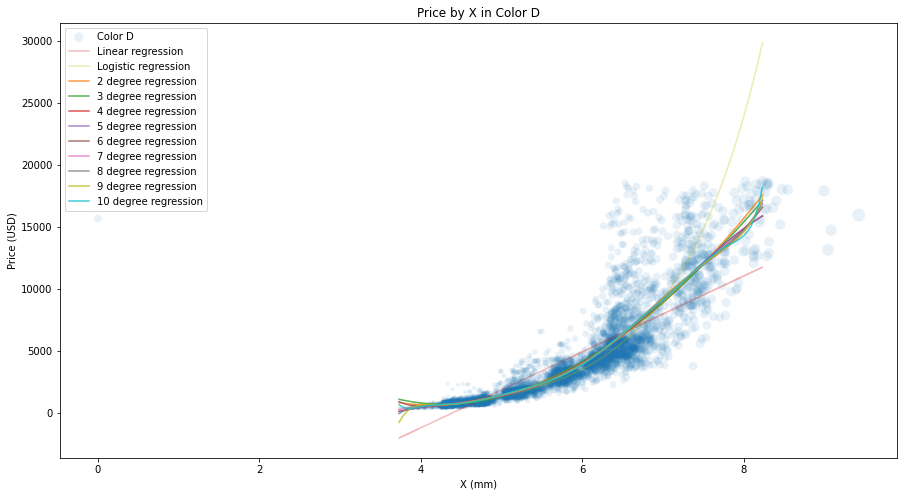

<Figure size 432x288 with 0 Axes>

In [143]:
# clean outlier data by 3 times standard deviation
dataFiltered = xPriceDF[xdPriceDF]
dataFiltered = dataFiltered[dataFiltered['x'] <= (np.mean(dataFiltered['x']) + np.std(dataFiltered['x'])*3)]
dataFiltered = dataFiltered[dataFiltered['x'] >= (np.mean(dataFiltered['x']) - np.std(dataFiltered['x'])*3)]

# extract x, y coordinate data
x = dataFiltered['x']
y = dataFiltered['price']

numer = np.sum((x - np.mean(x)) * (y - np.mean(y)))
denom = np.sum((x - np.mean(x)) ** 2)

a1 = numer / denom
a0 = np.mean(y) - a1 * np.mean(x)

def calc_predictions(x, n):
    if n == 1:
        return a0 + a1 * x
    elif n == 2:
        temp = np.polyfit(x, y, n)
        a2 = temp[2]
        return a0 + a1 * x + a2 * x ** 2
    return 0

def calc_sse(x, y, n):
    if n == 0.5:
        y_preds = alpha * np.exp(beta * x)
        func = np.poly1d(np.polyfit(np.log(x), y_preds, 1))
        return np.sum((y - func(x)) ** 2)
    elif n == 1:
        return np.sum((y - calc_predictions(x, n)) ** 2)
    elif n >= 2:
        temp = np.poly1d(np.polyfit(x, y, n))
        return np.sum((y - temp(x)) ** 2)
    return 0

#ploting data & data model
plt.figure(figsize=[15,8])
plt.title('Price by X in Color D')
plt.xlabel('X (mm)')
plt.ylabel('Price (USD)')
plt.scatter(xPriceDF[xdPriceDF]['x'], xPriceDF[xdPriceDF]['price'], s=xPriceDF[xdPriceDF]['carat']*50, color='tab:blue', edgecolors='none', alpha=0.1, label='Color D')

# graph color list
colorList = ['tab:red', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'tab:blue']

# x axis range model from minimum to maximum value of real x with 100 point
x_model = np.linspace(x.min(), x.max(), 100)

# Linear model
y_preds = calc_predictions(x, 1)
y_preds_sse = calc_sse(x, y, 1)
print('sum of squared error (linear): ' + str(y_preds_sse))
plt.plot(x, y_preds, color=colorList[0], alpha=0.3 ,label='Linear regression')

# log trick exponential model
A = np.vstack([x, np.ones(len(x))]).T
beta, log_alpha = np.linalg.lstsq(A, np.log(y), rcond = None)[0]
alpha = np.exp(log_alpha)

y_preds = alpha * np.exp(beta * x_model)
y_preds_sse = calc_sse(x_model, y_preds, 0.5)
print('sum of squared error (log trick): ' + str(y_preds_sse))
plt.plot(x_model, y_preds, "y", alpha=0.3, label='Logistic regression')

#prediction looping from 2 to 10 degree polynomial regression
for i in range(2, 11):
    y_preds = np.polyfit(x, y, i)
    y_preds_sse = calc_sse(x, y, i)
    print('sum of squared error ' + str(i) + ': ' + str(y_preds_sse))
    plt.plot(x_model, np.polyval(y_preds, x_model), color=colorList[i-1], alpha=0.8 ,label=str(i)+' degree regression')

plt.legend(loc='best')
plt.show()
plt.clf()

Pada grafik 'Price by X in Color D' dapat dilihat perbandingan ploting data sebenarnya dengan model prediksi yang dibuat mulai dari linear regression, logistic regression, hingga regression degree 10. Dari hasil sum of square error (SSE) dapat dilihat bahwa regresi polinom derajat 10 memiliki SSE terkecil tetapi karena model dibangun dengan semua data di color D ada kemungkinan overfitting maka eksperimen berikut untuk tipe grafik yang sama akan dibuat dari model yang datanya dibagi beberapa bagian seperti K-Fold Cross validation.

1351.0
sum of squared error (linear): 2762328937.2129574
sum of squared error (log trick, k=0): 1123517531581.2888
sum of squared error deg 2 (k=0) : 295982898.3697252
sum of squared error deg 3 (k=0) : 295978665.8076842
sum of squared error deg 4 (k=0) : 295913701.36472255
sum of squared error deg 5 (k=0) : 273227468.9989552


/var/folders/vp/jxfmw5m93x17ddbgqvc68q500000gn/T/ipykernel_2244/4060090573.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kFoldDF = kFoldDF.append(data, ignore_index=True)
/var/folders/vp/jxfmw5m93x17ddbgqvc68q500000gn/T/ipykernel_2244/4060090573.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kFoldDF = kFoldDF.append(data, ignore_index=True)
/var/folders/vp/jxfmw5m93x17ddbgqvc68q500000gn/T/ipykernel_2244/4060090573.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kFoldDF = kFoldDF.append(data, ignore_index=True)
/var/folders/vp/jxfmw5m93x17ddbgqvc68q500000gn/T/ipykernel_2244/4060090573.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.

sum of squared error deg 6 (k=0) : 251854988.66261205
sum of squared error deg 7 (k=0) : 247631744.27905196


/var/folders/vp/jxfmw5m93x17ddbgqvc68q500000gn/T/ipykernel_2244/4060090573.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kFoldDF = kFoldDF.append(data, ignore_index=True)
/var/folders/vp/jxfmw5m93x17ddbgqvc68q500000gn/T/ipykernel_2244/4060090573.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kFoldDF = kFoldDF.append(data, ignore_index=True)
/var/folders/vp/jxfmw5m93x17ddbgqvc68q500000gn/T/ipykernel_2244/4060090573.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kFoldDF = kFoldDF.append(data, ignore_index=True)


sum of squared error deg 8 (k=0) : 232136951.3517087
sum of squared error deg 9 (k=0) : 229953593.34268546


/var/folders/vp/jxfmw5m93x17ddbgqvc68q500000gn/T/ipykernel_2244/4060090573.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kFoldDF = kFoldDF.append(data, ignore_index=True)
/var/folders/vp/jxfmw5m93x17ddbgqvc68q500000gn/T/ipykernel_2244/4060090573.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kFoldDF = kFoldDF.append(data, ignore_index=True)


sum of squared error deg 10 (k=0) : 227904236.87118828


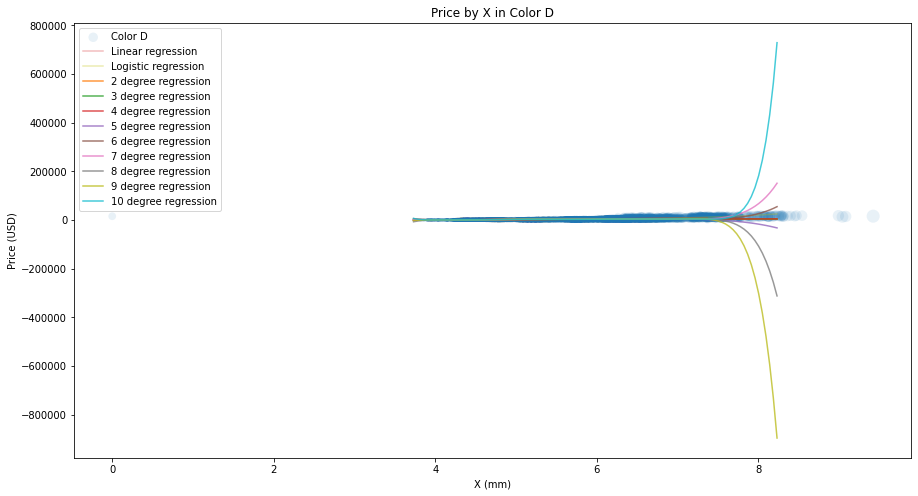

sum of squared error (linear): 2762328937.2129574
sum of squared error (log trick, k=0): 1123517531581.2888
sum of squared error deg 2 (k=1) : 3945614110.875062
sum of squared error deg 3 (k=1) : 3945529222.3157835
sum of squared error deg 4 (k=1) : 3930964340.9536304
sum of squared error deg 5 (k=1) : 3886176376.14435
sum of squared error deg 6 (k=1) : 3882637814.0124526
sum of squared error deg 7 (k=1) : 3864519968.8764586


/var/folders/vp/jxfmw5m93x17ddbgqvc68q500000gn/T/ipykernel_2244/4060090573.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kFoldDF = kFoldDF.append(data, ignore_index=True)
/var/folders/vp/jxfmw5m93x17ddbgqvc68q500000gn/T/ipykernel_2244/4060090573.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kFoldDF = kFoldDF.append(data, ignore_index=True)
/var/folders/vp/jxfmw5m93x17ddbgqvc68q500000gn/T/ipykernel_2244/4060090573.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kFoldDF = kFoldDF.append(data, ignore_index=True)
/var/folders/vp/jxfmw5m93x17ddbgqvc68q500000gn/T/ipykernel_2244/4060090573.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.

sum of squared error deg 8 (k=1) : 3863553279.445467
sum of squared error deg 9 (k=1) : 3859623048.424525
sum of squared error deg 10 (k=1) : 3849705194.772331


/var/folders/vp/jxfmw5m93x17ddbgqvc68q500000gn/T/ipykernel_2244/4060090573.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kFoldDF = kFoldDF.append(data, ignore_index=True)
/var/folders/vp/jxfmw5m93x17ddbgqvc68q500000gn/T/ipykernel_2244/4060090573.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kFoldDF = kFoldDF.append(data, ignore_index=True)


<Figure size 432x288 with 0 Axes>

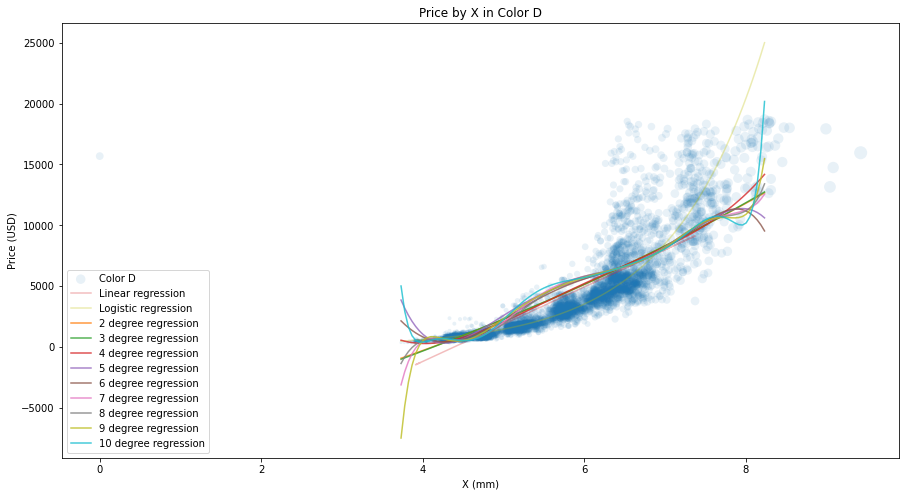

sum of squared error (linear): 2762328937.2129574
sum of squared error (log trick, k=0): 1123517531581.2888
sum of squared error deg 2 (k=2) : 2745612441.2594795
sum of squared error deg 3 (k=2) : 1286352977.1697497
sum of squared error deg 4 (k=2) : 1051524639.5152898
sum of squared error deg 5 (k=2) : 672474357.6888648
sum of squared error deg 6 (k=2) : 632034894.2587903
sum of squared error deg 7 (k=2) : 611468139.7332828
sum of squared error deg 8 (k=2) : 589671619.2176442
sum of squared error deg 9 (k=2) : 589517866.3800788
sum of squared error deg 10 (k=2) : 575880803.2926601


/var/folders/vp/jxfmw5m93x17ddbgqvc68q500000gn/T/ipykernel_2244/4060090573.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kFoldDF = kFoldDF.append(data, ignore_index=True)
/var/folders/vp/jxfmw5m93x17ddbgqvc68q500000gn/T/ipykernel_2244/4060090573.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kFoldDF = kFoldDF.append(data, ignore_index=True)
/var/folders/vp/jxfmw5m93x17ddbgqvc68q500000gn/T/ipykernel_2244/4060090573.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kFoldDF = kFoldDF.append(data, ignore_index=True)
/var/folders/vp/jxfmw5m93x17ddbgqvc68q500000gn/T/ipykernel_2244/4060090573.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.

<Figure size 432x288 with 0 Axes>

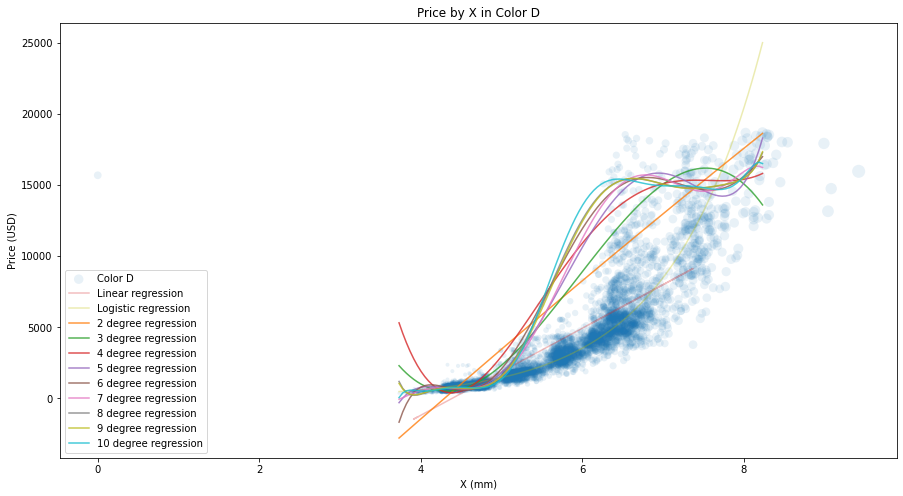

sum of squared error (linear): 2762328937.2129574
sum of squared error (log trick, k=0): 1123517531581.2888
sum of squared error deg 2 (k=3) : 34131349.0742386
sum of squared error deg 3 (k=3) : 33942620.23040035
sum of squared error deg 4 (k=3) : 33664742.59459484
sum of squared error deg 5 (k=3) : 33341639.702845067
sum of squared error deg 6 (k=3) : 32839103.63001077
sum of squared error deg 7 (k=3) : 32692210.44575943
sum of squared error deg 8 (k=3) : 32614955.71221901
sum of squared error deg 9 (k=3) : 32606611.516133033
sum of squared error deg 10 (k=3) : 32604432.218468573


/var/folders/vp/jxfmw5m93x17ddbgqvc68q500000gn/T/ipykernel_2244/4060090573.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kFoldDF = kFoldDF.append(data, ignore_index=True)
/var/folders/vp/jxfmw5m93x17ddbgqvc68q500000gn/T/ipykernel_2244/4060090573.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kFoldDF = kFoldDF.append(data, ignore_index=True)
/var/folders/vp/jxfmw5m93x17ddbgqvc68q500000gn/T/ipykernel_2244/4060090573.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kFoldDF = kFoldDF.append(data, ignore_index=True)
/var/folders/vp/jxfmw5m93x17ddbgqvc68q500000gn/T/ipykernel_2244/4060090573.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.

<Figure size 432x288 with 0 Axes>

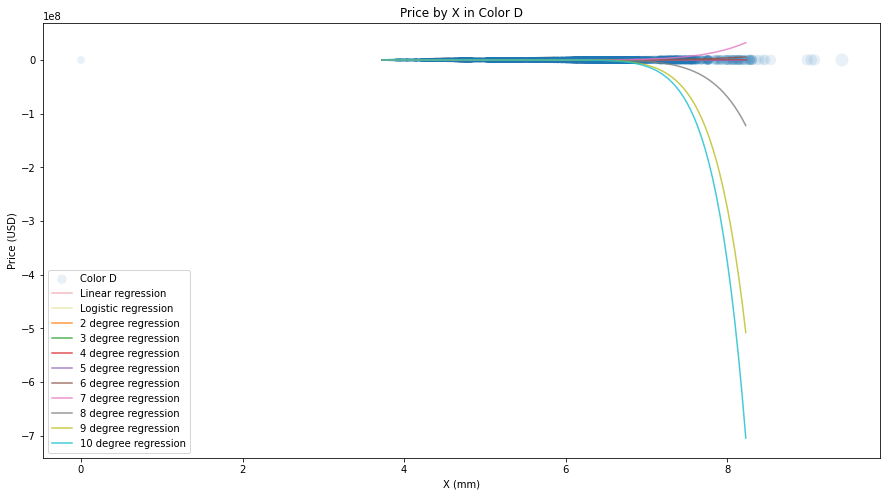

sum of squared error (linear): 2762328937.2129574
sum of squared error (log trick, k=0): 1123517531581.2888
sum of squared error deg 2 (k=4) : 96001323.84119433
sum of squared error deg 3 (k=4) : 94956812.82272185
sum of squared error deg 4 (k=4) : 94615843.7784763
sum of squared error deg 5 (k=4) : 90645617.13548553
sum of squared error deg 6 (k=4) : 88146789.00447723
sum of squared error deg 7 (k=4) : 86166925.24135101
sum of squared error deg 8 (k=4) : 84878138.75213993
sum of squared error deg 9 (k=4) : 84645965.5805386
sum of squared error deg 10 (k=4) : 84485857.95593143


/var/folders/vp/jxfmw5m93x17ddbgqvc68q500000gn/T/ipykernel_2244/4060090573.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kFoldDF = kFoldDF.append(data, ignore_index=True)
/var/folders/vp/jxfmw5m93x17ddbgqvc68q500000gn/T/ipykernel_2244/4060090573.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kFoldDF = kFoldDF.append(data, ignore_index=True)
/var/folders/vp/jxfmw5m93x17ddbgqvc68q500000gn/T/ipykernel_2244/4060090573.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kFoldDF = kFoldDF.append(data, ignore_index=True)
/var/folders/vp/jxfmw5m93x17ddbgqvc68q500000gn/T/ipykernel_2244/4060090573.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.

<Figure size 432x288 with 0 Axes>

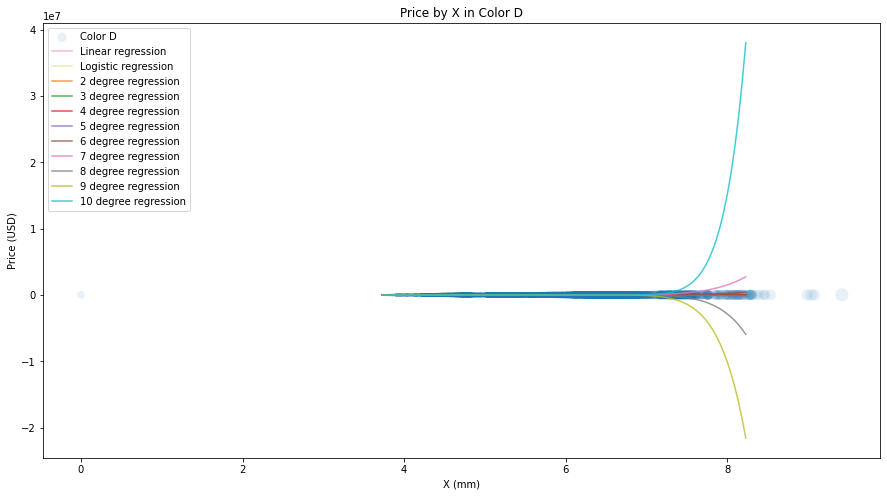

<Figure size 432x288 with 0 Axes>

In [206]:
# karena jumlah data habis dibagi 5 maka nilai K = 5 agar data yang dihasilkan bilangan bulat
print(x.count()/5)

# nilai K
k = 5

#  data frame to contain data from k-fold cross validation
kFoldDF = pd.DataFrame(columns=['Degree', 'K-Fold', 'Sum Square Error'])

#prediction looping from 2 to 10 degree polynomial regression
for a in range(0, 5):

    x_arr = np.array_split(x, k)
    y_arr = np.array_split(y, k)

    #ploting data & data model
    plt.figure(figsize=[15,8])
    plt.title('Price by X in Color D')
    plt.xlabel('X (mm)')
    plt.ylabel('Price (USD)')
    plt.scatter(xPriceDF[xdPriceDF]['x'], xPriceDF[xdPriceDF]['price'], s=xPriceDF[xdPriceDF]['carat']*50, color='tab:blue', edgecolors='none', alpha=0.1, label='Color D')

    # graph color list
    colorList = ['tab:red', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'tab:blue']

    # x axis range model from minimum to maximum value of real x with 100 point
    x_model = np.linspace(x.min(), x.max(), 100)

    # x, y split
    ySplit = y[y_arr[0].index]
    xSplit = x[y_arr[0].index]

    # Linear model
    y_preds = calc_predictions(xSplit, 1)
    y_preds_sse = calc_sse(xSplit, ySplit, 1)
    print('sum of squared error (linear): ' + str(y_preds_sse))
    plt.plot(xSplit, y_preds, color=colorList[0], alpha=0.3 ,label='Linear regression')

    data = {'Degree': 1, 'K-Fold': a+1, 'Sum Square Error': y_preds_sse}
    kFoldDF = kFoldDF.append(data, ignore_index=True)

    # log trick exponential model
    A = np.vstack([xSplit, np.ones(len(xSplit))]).T
    beta, log_alpha = np.linalg.lstsq(A, np.log(ySplit), rcond = None)[0]
    alpha = np.exp(log_alpha)

    y_preds = alpha * np.exp(beta * x_model)
    y_preds_sse = calc_sse(x_model, y_preds, 0.5)
    print('sum of squared error (log trick, k=0): ' + str(y_preds_sse))
    plt.plot(x_model, y_preds, "y", alpha=0.3, label='Logistic regression')

    data = {'Degree': 0.5, 'K-Fold': a+1, 'Sum Square Error': y_preds_sse}
    kFoldDF = kFoldDF.append(data, ignore_index=True)

    for i in range(2, 11):
        y_preds = np.polyfit(x_arr[a], y_arr[a], i)
        y_preds_sse = calc_sse(x_arr[a], y_arr[a], i)
        print('sum of squared error deg ' + str(i) + ' (k=' + str(a) + ') : ' + str(y_preds_sse))
        plt.plot(x_model, np.polyval(y_preds, x_model), color=colorList[i-1], alpha=0.8 ,label=str(i)+' degree regression')
        data = {'Degree': i, 'K-Fold': a+1, 'Sum Square Error': y_preds_sse}
        kFoldDF = kFoldDF.append(data, ignore_index=True)
    
    plt.legend(loc='best')
    plt.show()
    plt.clf()


Dari hasil percobaan pembuatan model dengan metode K-Fold berjumlah 5 mulai dari model linear, logistic, hingga derajat 10 yang dibandingkan dengan plot data asli menghasilkan sum of square untuk setiap eksperimennya.

Data-data tersebut dimasukan kedalam 1 buah Data Frame penampung bernama 'kFoldDF'. Setelah ini dari data-data tersebut akan digrup berdasarkan Degree model yang dibuat lalu dibuat rata-rata SSE dari masing-masing K-Fold. Maka akan dihasilkan model dengan SSE rata-rata terkecil dari 5 buah K-Fold yang telah diuji.

In [235]:
degreErrorDF = kFoldDF.groupby(['Degree']).agg(np.mean)

#deskripsi singkat dari data kFoldDF
print(kFoldDF.describe(include='all'))

# daftar rata-rata nilai sum of squared error setiap derajatnya
print(degreErrorDF['Sum Square Error'])

print('Lowest mean SSE model: ' + str(int(degreErrorDF['Sum Square Error'].idxmin())))

        Degree  K-Fold  Sum Square Error
count     55.0    55.0      5.500000e+01
unique    11.0     5.0      4.700000e+01
top        1.0     1.0      2.762329e+09
freq       5.0    11.0      5.000000e+00
Degree
0.5     1.123518e+12
1.0     2.762329e+09
2.0     1.423468e+09
3.0     1.131352e+09
4.0     1.081337e+09
5.0     9.911731e+08
6.0     9.775027e+08
7.0     9.684958e+08
8.0     9.605710e+08
9.0     9.592694e+08
10.0    9.541161e+08
Name: Sum Square Error, dtype: float64
Lowest mean SSE model: 10


In [207]:
# debug code
# print(x[x <= (np.mean(x) + np.std(x)*3)])
# x >= (np.mean(x) - np.std(x)*3)
# print(diamondDataFrame.groupby('color').agg(['count']))
# print(diamondDataFrame.groupby('color')['price'].mean().loc['D'])
# print(diamondDataFrame.head())
# print(caratDataStat.index, caratDataStat['count'])
# print(dataMeanClarityDF['x'].head())

# print(calc_predictions(x, 3))
# print(y[y_arr[0].index])
# print(y_arr[0].index)
print(kFoldDF)

   Degree K-Fold      Sum Square Error
0     1.0    1.0     2762328937.212957
1     0.5    1.0  1123517531581.288818
2     2.0    1.0      295982898.369725
3     3.0    1.0      295978665.807684
4     4.0    1.0      295913701.364723
5     5.0    1.0      273227468.998955
6     6.0    1.0      251854988.662612
7     7.0    1.0      247631744.279052
8     8.0    1.0      232136951.351709
9     9.0    1.0      229953593.342685
10   10.0    1.0      227904236.871188
11    1.0    2.0     2762328937.212957
12    0.5    2.0  1123517531581.288818
13    2.0    2.0     3945614110.875062
14    3.0    2.0     3945529222.315784
15    4.0    2.0      3930964340.95363
16    5.0    2.0      3886176376.14435
17    6.0    2.0     3882637814.012453
18    7.0    2.0     3864519968.876459
19    8.0    2.0     3863553279.445467
20    9.0    2.0     3859623048.424525
21   10.0    2.0     3849705194.772331
22    1.0    3.0     2762328937.212957
23    0.5    3.0  1123517531581.288818
24    2.0    3.0      274